# W9 Lab Assignment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss

sns.set_style('white')

%matplotlib inline

# High dimensional data

In the IMDb dataset, we have two dimensions (number of votes and rating). How about if we have high dimensional data? 
First, in many cases, the number of dimensions is not too large. For instance, the ["Iris" dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) contains four dimensions of measurements on the three types of iris flower species. It's more than two dimensions, yet still manageable. 

This dataset is also included in seaborn, so we can load it.

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We get four dimensions (sepal_length, sepal_width, petal_length, petal_width). One direct way to visualize them is to have a scatter plot for each pair of dimensions. We can use the [**`pairplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function in seaborn to do this.

Try the following code. What do you see?

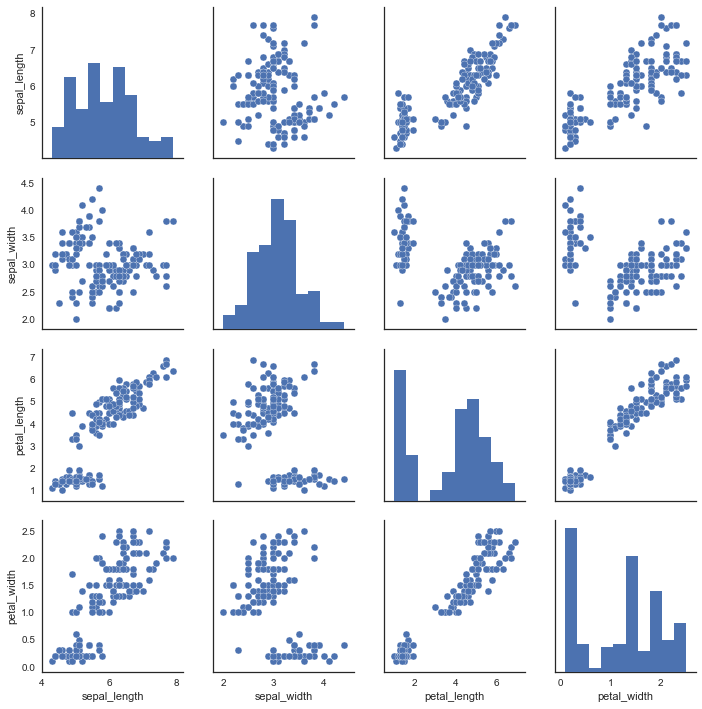

In [3]:
sns.pairplot(iris)


**Observations**   

The `pairplot` produces a 4x4 grid of plots. The docs on this function note:

> Plot pairwise relationships in a dataset

What we see:   
1. Histograms plotted along the diagonal, where the `x` and `y` values correspond to the same variable. This shows the distribution of values.
2. Scatterplots are plotted everywhere else, where the `x` and `y` values correspond to different variables; these will tend to show correlation(s).

What we don't see:
- there is no distinction by *species* in acy of the plots; the data is intermingled

We can also color the symbols based on species:

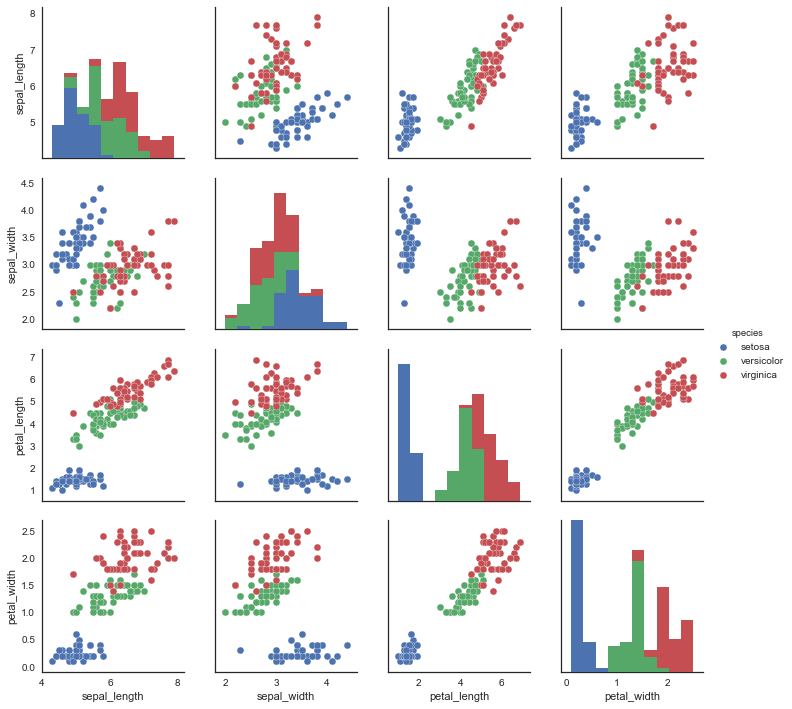

In [4]:
sns.pairplot(iris, hue='species')

The colors represent the three different iris species, so based on the colors, we can tell that when we draw a scatter plot of a pair of dimensions, whether the plot seperates out the species clearly or not. What do you think are the pair of dimensions that best seperate the species?

**Explanation**

> *What do you think are the pair of dimensions that best seperate the species?*

To determine "best separation by pair of dimensions" we should be looking at the scatterplots for no overlapping values, or very little overlap of values. Ideally we would see three completely separate clusters of colored dots.

Based on these scatterplots, I think that `petal length` and `petal width` are the pair of dimensions which best separate the species.

## PCA 

The [principal component analysis (PCA)](http://setosa.io/ev/principal-component-analysis/) is a nice dimensionality reduction method. The goal of dimensionality reduction is, of course, to reduce the number of variables (dimensions, measurements, columns). 

For example, in the Iris dataset we have four variables (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`). If we can reduce the number of variables to two, then we can easily visualize them. PCA offers one way to do this.

PCA is already implemented in the [scikit-learn](http://scikit-learn.org/stable/) package, a machine learning library in Python, which should have been included in Anaconda. If not, to install scikit-learn, run:

`conda install scikit-learn`

or

`pip install scikit-learn`

Before running PCA, we need to transform the `iris` from [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) to [Numpy's array](http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) object. [DataFrame.values](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html) returns the Numpy representation of `DataFrame`.

Extract the four variable as X and species as Y:

In [5]:
X = iris.values[:, 0:4] # extract the 1st to the 3rd columns of all rows
Y = iris.values[:, 4] # extract the 4th column of all rows
print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

We can now perform PCA with the following code:

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # set the number of components to 2
X_r = pca.fit(X).transform(X)

#Make a dataframe with the results
df = pd.DataFrame(X_r, columns=['PC1', 'PC2'])
df['species'] = Y
df.head()

,PC1,PC2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


Now we only have two dimensions. We can plot them again with the previous code:

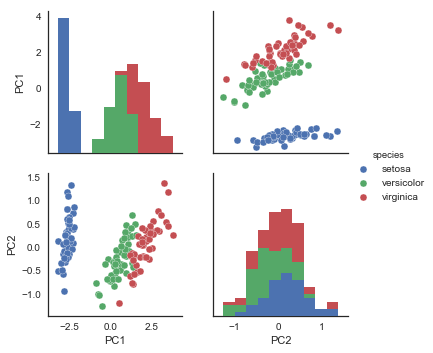

In [7]:
sns.pairplot(df, hue='species')

Compare with the previous plot. What do you think PCA was doing? How did it reduce dimensionality to 2?

**Thoughts**

> *Compare with the previous plot. What do you think PCA was doing? How did it reduce dimensionality to 2?*

The goal of PCA is to map combinations of variables (in multiple dimensions) into lower-dimension space, ideally one or two dimensions. What these plots are showing is that the *versicolor* and *virginica* Iris varieties are similar, while the *setosa* Iris is different (from the other two).

The dimensionality reduction was achieved by finding variation in the initial data set variable combinations, and creating a mapping function which transformed the data set to emphasize that variance. When looking back at the initial pairplots we can clearly see in every case the *setosa* was clustered by itself, while the *versicolor* and *virginica* were grouped near each other with varying amounts of overlap.

## t-SNE
[t-SNE (t-Distributed Stochastic Neighbor Embedding)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)  is also a tool to visualize high-dimensional data. The technique has become widespread in the field of machine learning, since it has an almost magical ability to create compelling two-dimensonal “maps” from data with hundreds or even thousands of dimensions. 

Let's try it out with the iris data.

In [8]:
from sklearn.manifold import TSNE

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
X_tsne = TSNE(learning_rate=100, perplexity=30).fit_transform(iris.data)

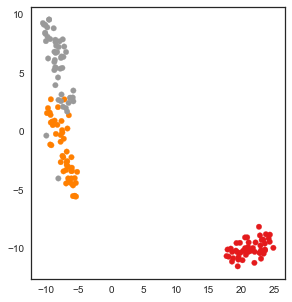

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='Set1', s=30)

The hyperparameter `perplexity` determines how to balance attention between local and global aspects of your data. Changing this parameter (default is 30) can cause drastic changes in the output:

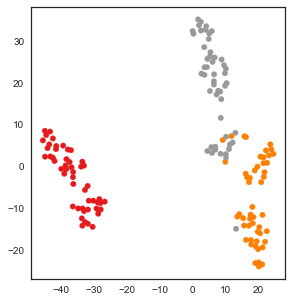

In [11]:
X_tsne = TSNE(learning_rate=100, perplexity=10).fit_transform(iris.data)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='Set1', s=30)

Experiment with a few different perplexity values. How do you think it influences the result?

In [ ]:
#TODO: put your experiments and answers here.

**Experiment**

In running the cell with `perplexity` set to **30** several times, I noted some changes in the visualizations presented by successive iterations. It appeared to be the same basic plot in terms of grouping and clustering, but the placement of the clusters varied. So I opted to run the t-SNE several times with `perplexity` set to **30** and show each plot.

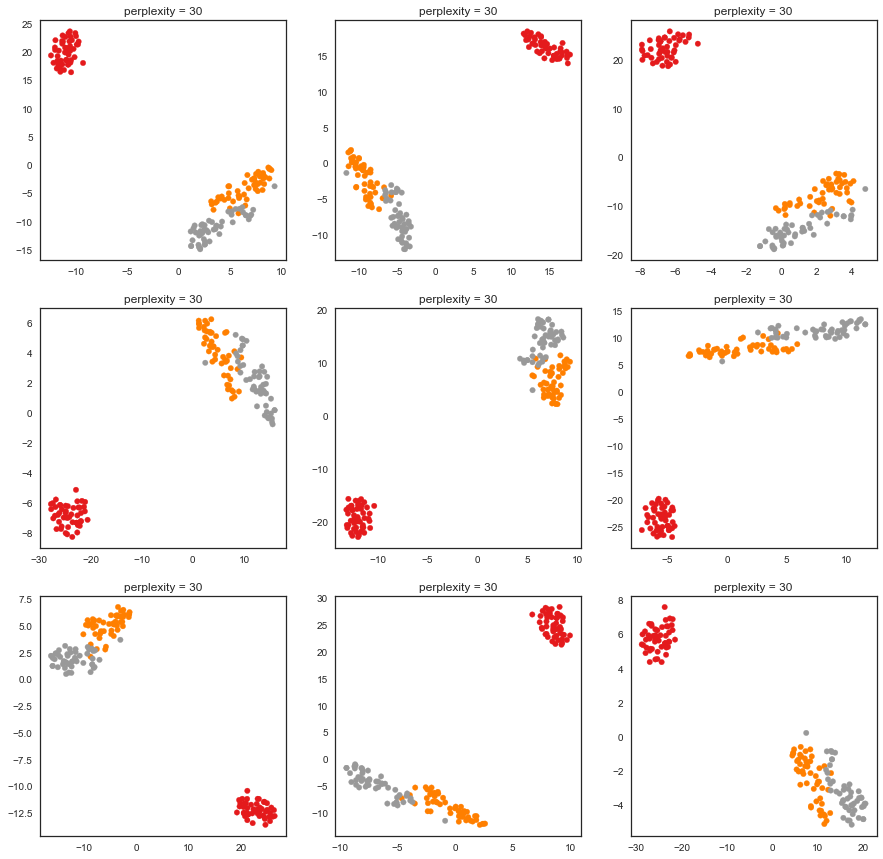

In [51]:
plt.figure(figsize=(15, 15))

perplexities = [30, 30, 30, 30, 30, 30, 30, 30, 30]
count = 0
for ppxty in perplexities:
    count += 1
    X_tsne = TSNE(learning_rate=100, perplexity=ppxty).fit_transform(iris.data)    
    plt.subplot(3,3,count)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='Set1', s=30)
    plt.title("perplexity = {}".format(ppxty))

**Observations**

Like the initial few times when "manually" trying this, the more controlled experiment produced the same basic results. The groups and clustering all appear to be generally the same size, and generally the same proximity to each other. But the location of each varies from run to run. In some cases the *orange* and *gray* clusters appear a little more spread out, but they tend to have the same size and spread.

**Experiment**

Run the t-SNE nine times with `perplexity` values in the range of 10 to 90.

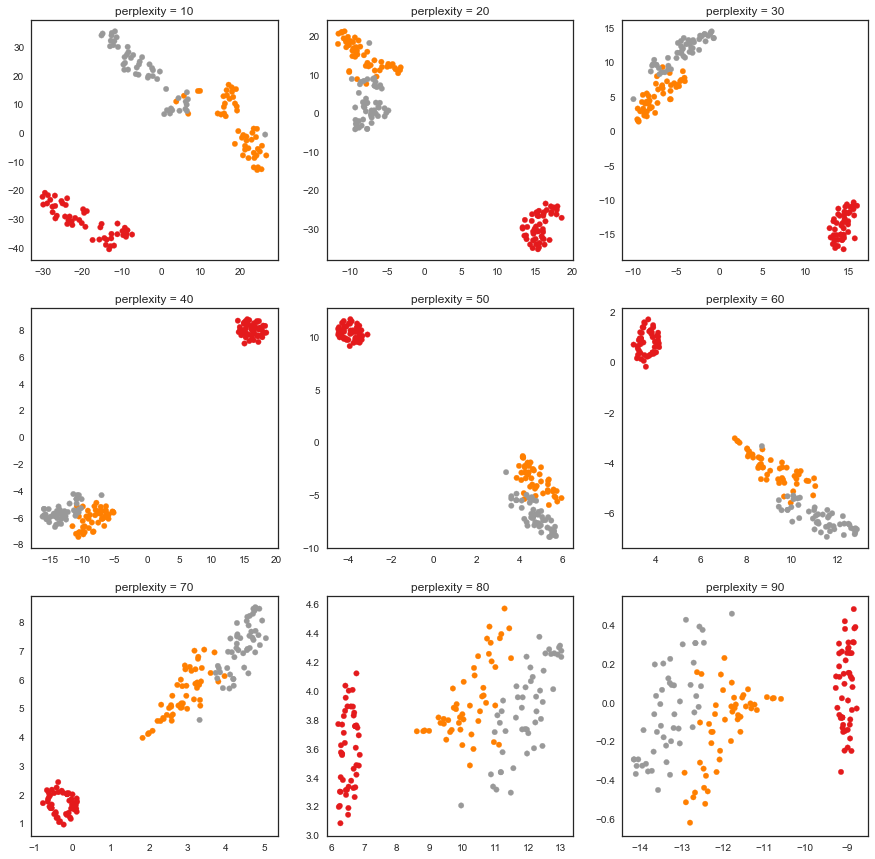

In [52]:
plt.figure(figsize=(15, 15))

perplexities = [10, 20, 30, 40, 50, 60, 70, 80, 90]
count = 0
for ppxty in perplexities:
    count += 1
    X_tsne = TSNE(learning_rate=100, perplexity=ppxty).fit_transform(iris.data)    
    plt.subplot(3,3,count)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='Set1', s=30)
    plt.title("perplexity = {}".format(ppxty))

**Observations**

In these experiemnts we can definitely see some varied results with the different values of `perplexity`. In the lower value range: 10, 20, 30, and 40 we observe that the grouping and clustering gets tighter. At 50 it appears close to the same as 40, but may show signs of spreading out. At 60 and 70 the clusters begin to show absolute signs of spreading. At 80 and 90 the clusters have spread across the spectrum of x- and y-axis values.

Assuming a *tight* cluster is the most desired outcome, then `perplexity` in the range of 30 - 50 would seem ideal.